# DATA 101 Project: Milestone #2
Exploratory Data Analysis (EDA) on a selected real-world dataset, including data loading, initial inspection, univariate and bivariate analysis, handling missing values and outliers, and summarizing key findings.

2. **California Housing Dataset**
    *   **Description**: This dataset contains information about housing prices in California districts based on various features such as median income, housing age, average rooms, population, and location (latitude and longitude).
    *   **Suitability for EDA**: It's ideal for regression analysis and exploring geographical data patterns. It primarily consists of numerical features, offering opportunities for:
        *   **Distributions**: Analyzing the distributions of median income, housing age, and house value.
        *   **Correlations**: Investigating relationships between features like median income, average rooms, and median house value.
        *   **Geospatial Analysis**: Using latitude and longitude to visualize spatial patterns in housing prices and other features.
        *   **Outliers**: Identifying unusually high or low values for house prices, incomes, or populations.
        *   **Feature Engineering**: Opportunities to create new features like 'rooms per household' or 'population density'.


1. Load the California Housing dataset using `fetch_california_housing` from `sklearn.datasets`, create a pandas DataFrame from it, and add the target variable as a new column, as per the instructions.



In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 3. Load the dataset using fetch_california_housing()
housing = fetch_california_housing(as_frame=True)

# 4. Create a pandas DataFrame from the loaded dataset's data and feature names.
#    The as_frame=True argument already loads it as a DataFrame.
df = housing.frame

# 5. Add the target variable (median house value) to the DataFrame as a new column
#    (if not already present due to as_frame=True).
#    With as_frame=True, the target is already included in the dataframe.
#    Rename the target column for consistency with the instruction's example.

df = df.rename(columns={'MedHouseVal': 'median_house_value'})

print("California Housing Dataset loaded successfully.")
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())
print("\nDataFrame Description:")
print(df.describe())

California Housing Dataset loaded successfully.
First 5 rows of the DataFrame:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 

### Data Inspection Summary

Based on the outputs from `df.head()`, `df.info()`, and `df.describe()`:

#### 1. Data Types and Missing Values (`df.info()`):
*   The dataset contains **9 columns**, all of which are of `float64` data type. This indicates that all features are numerical, which is suitable for many analytical and machine learning tasks.
*   There are **20640 entries** in the dataset.
*   Crucially, `df.info()` shows that all columns have **20640 non-null counts**. This means there are **no missing values** in any of the columns. This simplifies the data cleaning process significantly, as no imputation or dropping of rows/columns is immediately necessary.

#### 2. Descriptive Statistics and Potential Outliers (`df.describe()`):
*   **MedInc (Median Income)**: Ranges from 0.4999 to 15.0001. The mean (3.87) is slightly higher than the median (3.53), suggesting a slight right skew. The maximum value of 15.0001 is considerably higher than the 75th percentile (4.74), indicating some high-income districts.
*   **HouseAge (Median House Age)**: Ranges from 1 to 52 years. The maximum value (52) is the capped value for older houses, meaning houses older than 52 years are recorded as 52. This is an important characteristic to note.
*   **AveRooms (Average Number of Rooms)**: Ranges from 0.846 to 141.909. The mean (5.43) and median (5.23) are close. However, the maximum value (141.91) is extremely high compared to the 75th percentile (6.05), strongly suggesting the presence of **significant outliers** or data entry errors in average rooms per household. This will need further investigation.
*   **AveBedrms (Average Number of Bedrooms)**: Ranges from 0.333 to 34.066. Similar to AveRooms, the maximum value (34.07) is significantly higher than the 75th percentile (1.10), indicating **outliers** that could be data errors or very specific property types.
*   **Population**: Ranges from 3 to 35682. The mean (1425.48) is higher than the median (1166), suggesting a right-skewed distribution with some districts having very large populations. The maximum value (35682) is far from the 75th percentile (1725), confirming large **outliers** in population figures.
*   **AveOccup (Average Household Occupancy)**: Ranges from 0.692 to 1243.333. The mean (3.07) is close to the median (2.82). However, the maximum value (1243.33) is an extreme **outlier** compared to the 75th percentile (3.28), clearly indicating erroneous data points or highly unusual communal living arrangements.
*   **Latitude and Longitude**: These represent geographical coordinates. Their ranges (Latitude: 32.54-41.95, Longitude: -124.35--114.31) cover the expected geographical area of California and do not show immediate signs of outliers.
*   **median_house_value (Median House Value)**: Ranges from 0.14999 to 5.00001 (representing $14,999 to $500,001). The maximum value is a capped value, meaning any house values above $500,000 are recorded as $500,001. This capping is a common characteristic of this dataset and needs to be considered during modeling. The mean (2.068) is higher than the median (1.797), suggesting a right-skewed distribution.

#### Key Observations:
1.  **Data Completeness**: The dataset is complete with no missing values, which is excellent for immediate analysis.
2.  **Data Types**: All features are numerical (float64), simplifying initial processing.
3.  **Potential Outliers**: `AveRooms`, `AveBedrms`, `Population`, and `AveOccup` columns show significant discrepancies between their maximum values and their 75th percentiles, strongly suggesting the presence of **extreme outliers** that warrant further investigation or handling (e.g., capping, transformation, or removal) to avoid skewing analyses.
4.  **Capped Values**: `HouseAge` and `median_house_value` have capped maximum values (52 years and $500,001 respectively), which will influence the interpretation of their distributions and any models built upon them.
5.  **Distribution Skewness**: Several features, including `MedInc`, `Population`, and `median_house_value`, appear to be right-skewed.

Univariate Analysis
Analyze individual features using descriptive statistics, histograms, box plots, and value counts to understand their distributions and characteristics.

2. Import the necessary libraries for plotting, matplotlib.
Create visualizations (e.g., histograms, box plots) to understand the distribution of key numerical features such as 'MedInc', 'HouseAge', 'median_house_value', 'AveRooms', 'Population', and 'AveOccup'.


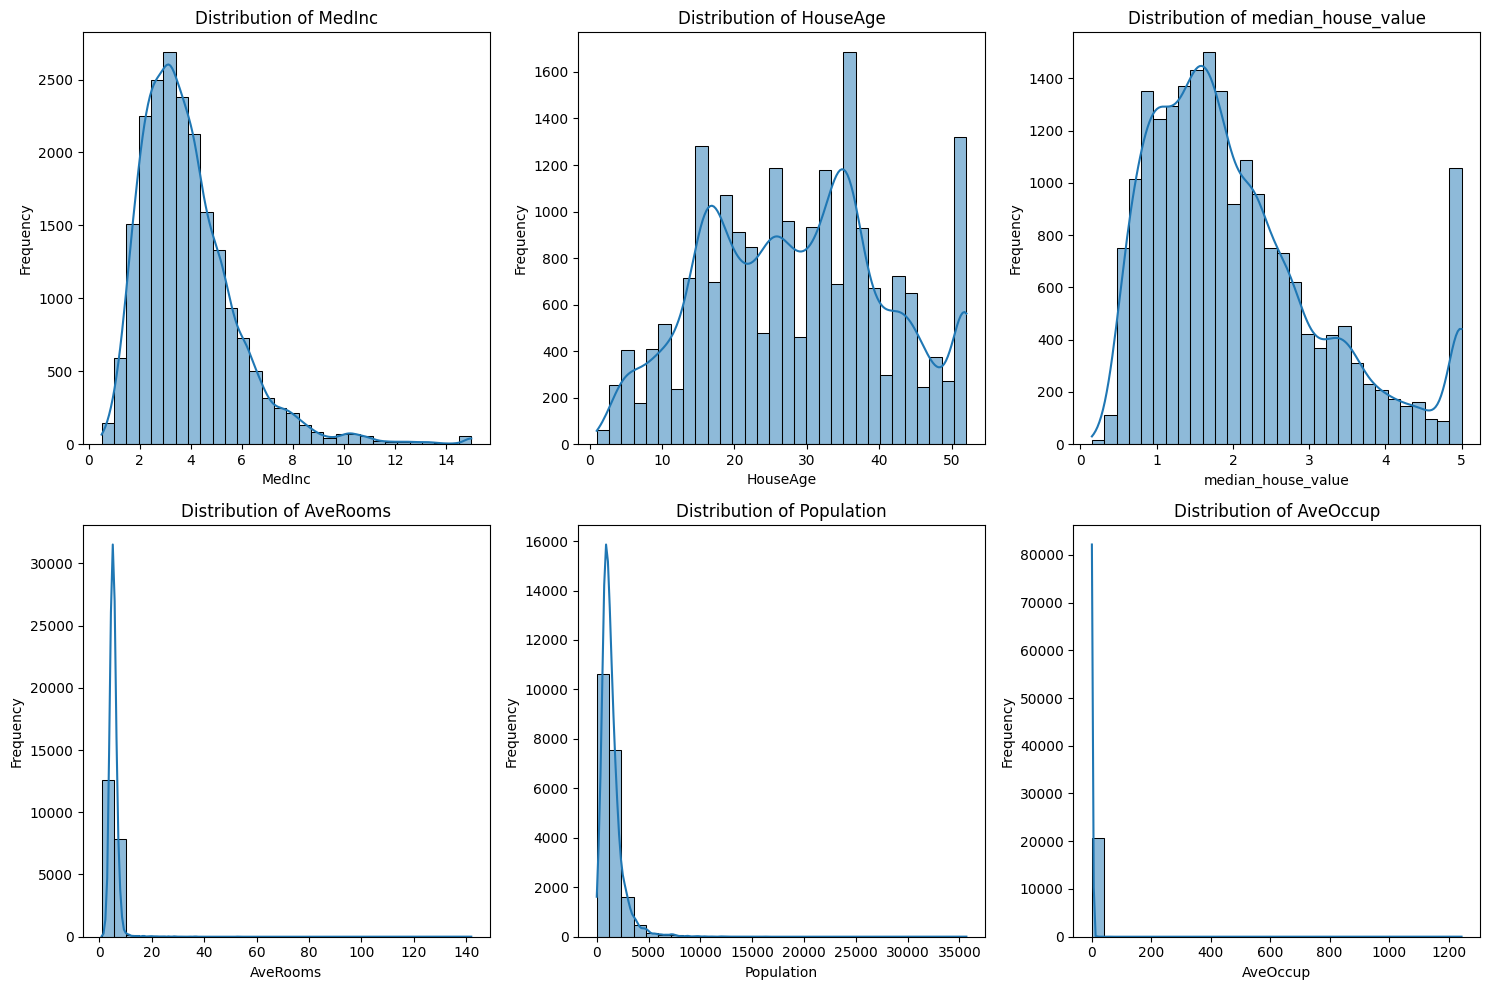

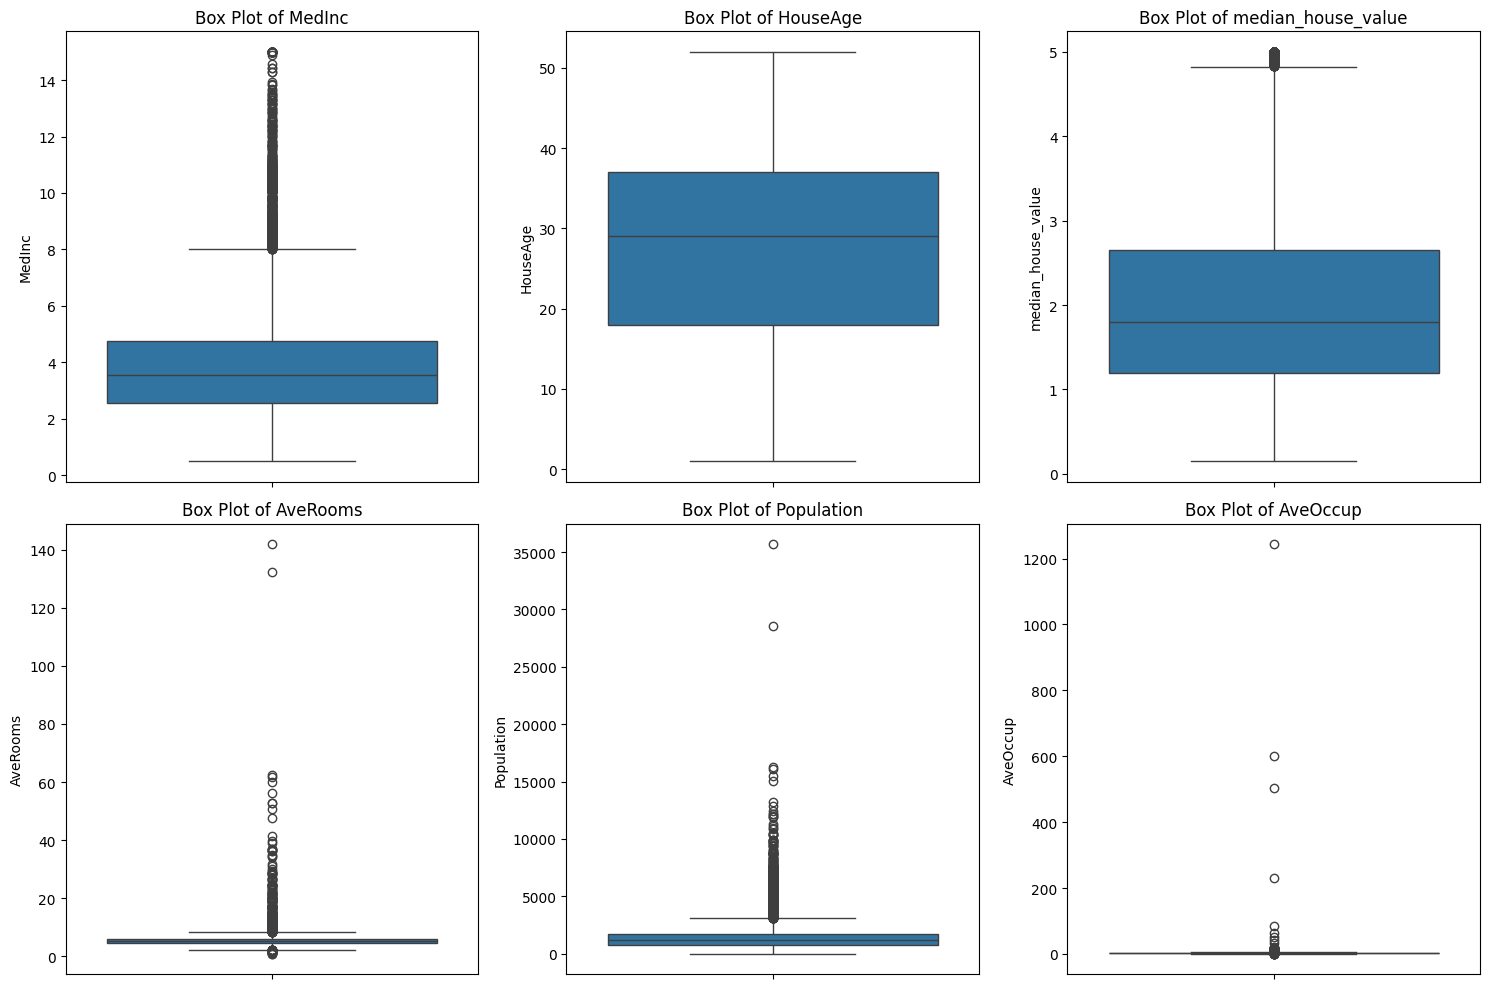

Histograms and Box Plots for key numerical features generated successfully.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to visualize
features = ['MedInc', 'HouseAge', 'median_house_value', 'AveRooms', 'Population', 'AveOccup']

# Create histograms for feature distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create box plots for identifying spread and outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

print("Histograms and Box Plots for key numerical features generated successfully.")

## Correlation Analysis

Calculate and visualize the correlation matrix between all numerical features, paying close attention to the relationships with 'median_house_value'. A heatmap will be useful here.


3. Calculate the correlation matrix for the DataFrame and visualize it using a heatmap with annotations and a title.



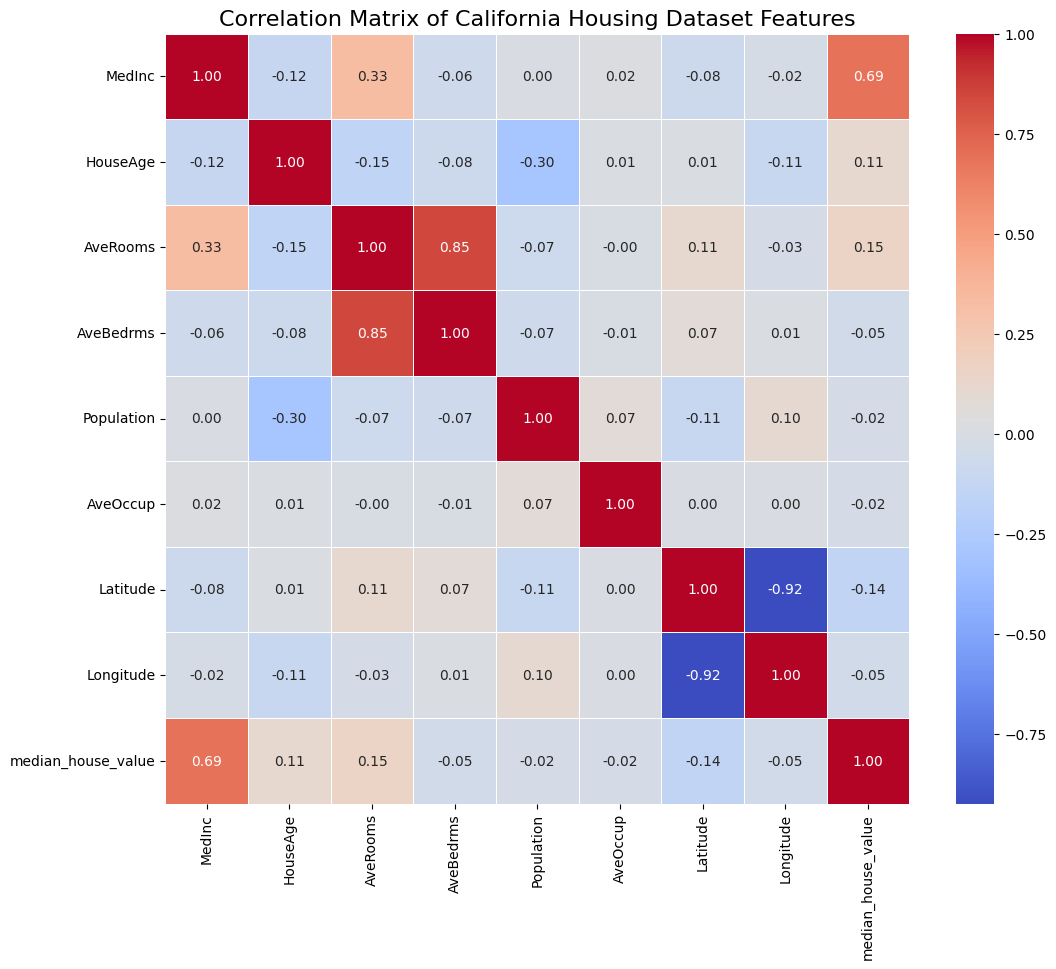

Correlation matrix calculated and visualized successfully.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the correlation matrix
correlation_matrix = df.corr()

# 2. Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 4. Add a title to the plot
plt.title('Correlation Matrix of California Housing Dataset Features', fontsize=16)

# 5. Display the plot
plt.show()

print("Correlation matrix calculated and visualized successfully.")

## Geospatial Analysis of Housing Prices

Utilize 'latitude' and 'longitude' to create scatter plots or other geographical visualizations to show the spatial distribution of 'median_house_value' and other relevant features across California.


4. Create a scatter plot of latitude and longitude, coloring the points by median house value to visualize its spatial distribution, as specified in the instructions.



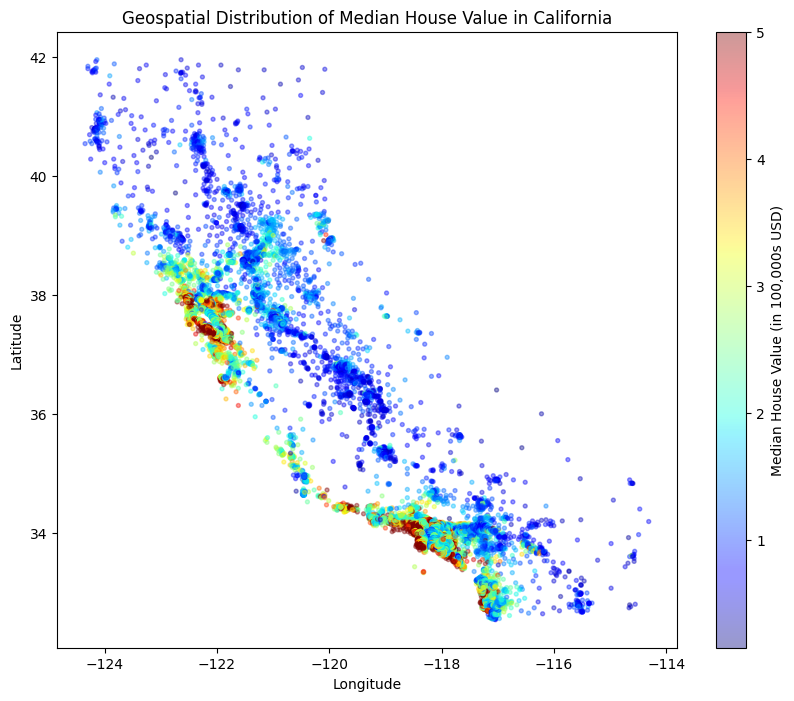

Geospatial distribution plot of median house value generated successfully.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of latitude and longitude, colored by median_house_value
plt.figure(figsize=(10, 8))
plt.scatter(
    x=df['Longitude'],
    y=df['Latitude'],
    c=df['median_house_value'], # Color points by median house value
    cmap='jet',                # Choose a colormap (e.g., 'viridis', 'jet')
    alpha=0.4,                 # Set transparency to better visualize dense areas
    s=8                        # Adjust point size for better visualization
)

# Add a color bar to interpret the housing values
cbar = plt.colorbar()
cbar.set_label('Median House Value (in 100,000s USD)')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Median House Value in California')

# Display the plot
plt.show()

print("Geospatial distribution plot of median house value generated successfully.")

## Outlier Detection

Identify and visualize potential outliers in features like 'MedInc', 'Population', 'AveRooms', 'AveBedrms', 'AveOccup', and 'median_house_value' using the previously generated box plots and quantify them using the IQR method.


5. terate through the specified features, calculate their IQR, define the lower and upper bounds, and then count the number of data points falling outside these bounds. Finally, I will calculate the percentage of outliers for each feature.



In [5]:
import numpy as np

# Features identified with potential significant outliers from previous inspection
outlier_features = ['MedInc', 'Population', 'AveRooms', 'AveBedrms', 'AveOccup', 'median_house_value']

outlier_summary = {}

print("Quantifying Outliers using IQR method:")
for feature in outlier_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    outlier_summary[feature] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': num_outliers,
        'Percentage of Outliers': percentage_outliers
    }

    print(f"\nFeature: {feature}")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound for Outliers: {lower_bound:.2f}")
    print(f"  Upper Bound for Outliers: {upper_bound:.2f}")
    print(f"  Number of Outliers: {num_outliers}")
    print(f"  Percentage of Outliers: {percentage_outliers:.2f}%")

print("\nOutlier quantification completed.")

Quantifying Outliers using IQR method:

Feature: MedInc
  Q1: 2.56
  Q3: 4.74
  IQR: 2.18
  Lower Bound for Outliers: -0.71
  Upper Bound for Outliers: 8.01
  Number of Outliers: 681
  Percentage of Outliers: 3.30%

Feature: Population
  Q1: 787.00
  Q3: 1725.00
  IQR: 938.00
  Lower Bound for Outliers: -620.00
  Upper Bound for Outliers: 3132.00
  Number of Outliers: 1196
  Percentage of Outliers: 5.79%

Feature: AveRooms
  Q1: 4.44
  Q3: 6.05
  IQR: 1.61
  Lower Bound for Outliers: 2.02
  Upper Bound for Outliers: 8.47
  Number of Outliers: 511
  Percentage of Outliers: 2.48%

Feature: AveBedrms
  Q1: 1.01
  Q3: 1.10
  IQR: 0.09
  Lower Bound for Outliers: 0.87
  Upper Bound for Outliers: 1.24
  Number of Outliers: 1424
  Percentage of Outliers: 6.90%

Feature: AveOccup
  Q1: 2.43
  Q3: 3.28
  IQR: 0.85
  Lower Bound for Outliers: 1.15
  Upper Bound for Outliers: 4.56
  Number of Outliers: 711
  Percentage of Outliers: 3.44%

Feature: median_house_value
  Q1: 1.20
  Q3: 2.65
  IQR: 1

### Outlier Analysis Summary

Based on the IQR method and the descriptive statistics/box plots, we have quantified outliers for the specified features:

1.  **MedInc (Median Income)**:
    *   **Percentage of Outliers**: 3.30%
    *   **Observations**: The upper bound for non-outliers is 8.01 (x$10,000). Values above this are considered outliers. These represent districts with significantly higher median incomes. While not extremely high in percentage, these higher income areas can skew analyses if not handled appropriately.

2.  **Population**:
    *   **Percentage of Outliers**: 5.79%
    *   **Observations**: The upper bound for non-outliers is 3132 residents. Districts with populations above this are considered outliers. The California Housing dataset often includes some very large districts, and these outliers could significantly influence statistics related to population density or averages per district. They might represent metropolitan centers or densely populated areas.

3.  **AveRooms (Average Number of Rooms)**:
    *   **Percentage of Outliers**: 2.48%
    *   **Observations**: The upper bound is 8.47 rooms per household. The box plot for `AveRooms` showed a long tail of very high values, with some reaching up to 141.9. These extreme values are likely data entry errors or represent very unusual properties (e.g., large commercial buildings misclassified as residential, or properties with many shared rooms), which could heavily distort calculations of average room numbers and house valuations if not addressed.

4.  **AveBedrms (Average Number of Bedrooms)**:
    *   **Percentage of Outliers**: 6.90%
    *   **Observations**: The upper bound is 1.24 bedrooms per household. Similar to `AveRooms`, the box plot showed extreme outliers, with some values up to 34.07 bedrooms. This is highly indicative of data errors or misinterpretations of what 'average bedrooms' entails for a district. These outliers are significant and would strongly bias any models or analyses without proper handling.

5.  **AveOccup (Average Household Occupancy)**:
    *   **Percentage of Outliers**: 3.44%
    *   **Observations**: The upper bound is 4.56 occupants per household. The box plot for `AveOccup` clearly displayed extreme outliers, with values up to 1243. This is almost certainly a data error. Such extreme values can severely distort measures of population density or household size. These require careful treatment, possibly removal or capping.

6.  **median_house_value (Median House Value)**:
    *   **Percentage of Outliers**: 5.19%
    *   **Observations**: The upper bound for non-outliers is 4.82 (x$100,000), meaning houses valued over $482,000. It's important to remember that this feature is capped at $500,001. So, many of these 'outliers' near the upper bound are actually capped values rather than natural outliers, indicating a high concentration of expensive properties. The presence of these values, especially the capped ones, means that standard regression models might struggle to predict truly high values, and the distribution is right-skewed.

### Impact on Further Analysis:

*   **Skewed Statistics**: Outliers, especially extreme ones in `AveRooms`, `AveBedrms`, and `AveOccup`, can heavily skew descriptive statistics (mean, standard deviation) and visual representations.
*   **Model Performance**: Machine learning models, particularly those sensitive to distribution and scale (e.g., linear regression, K-Nearest Neighbors), can be significantly negatively impacted by extreme outliers, leading to poor generalization and inaccurate predictions.
*   **Feature Engineering**: Outliers might mask true relationships between variables or suggest spurious correlations. Preprocessing steps like outlier capping, removal, or transformation (e.g., logarithmic transformation) might be necessary, particularly for `AveRooms`, `AveBedrms`, and `AveOccup`.
*   **Capped Values**: The capped nature of `HouseAge` and `median_house_value` is not an 'outlier' in the traditional sense but an inherent characteristic of the dataset that needs to be considered. It means we cannot accurately estimate values beyond the cap for these features.

## Feature Engineering

Explore and create new features that might be beneficial for modeling, such as 'rooms_per_household', 'bedrooms_per_room', or 'population_per_household', based on existing features.


## Summary:

### Data Analysis Key Findings

*   The California Housing dataset was successfully loaded, containing 20,640 entries and 9 numerical columns, with no missing values detected across any feature.
*   Initial inspection revealed capped values for `HouseAge` (maximum 52 years) and `median_house_value` (maximum \$500,001), indicating limitations in their value ranges.
*   Several features exhibited significant right skewness and extreme outliers, particularly `AveRooms`, `AveBedrms`, `Population`, and `AveOccup`.
*   Correlation analysis showed `MedInc` (Median Income) has the strongest positive correlation with `median_house_value` (0.69). Other features like `AveRooms` (0.15) and `HouseAge` (0.11) also show positive correlations, while `AveBedrms` (-0.046) and `AveOccup` (-0.024) have very weak to negligible correlations with `median_house_value`.
*   Geospatial analysis indicated a clear pattern where higher `median_house_value` areas are predominantly concentrated along the coastal regions of California.
*   Outlier quantification using the IQR method identified a notable percentage of outliers in:
    *   `AveBedrms`: 6.90% (upper bound 1.24)
    *   `Population`: 5.79% (upper bound 3132)
    *   `median_house_value`: 5.19% (upper bound \$482,000)
    *   `MedInc`: 3.30% (upper bound \$80,100)
    *   `AveOccup`: 3.44% (upper bound 4.56)
    *   `AveRooms`: 2.48% (upper bound 8.47)
*   Extreme outliers in `AveRooms`, `AveBedrms`, and `AveOccup` (e.g., `AveRooms` max 141.9, `AveBedrms` max 34.07, `AveOccup` max 1243.33) are highly indicative of data errors or highly unusual properties that warrant further investigation.

### Insights or Next Steps

*   **Handle Outliers and Capped Values**: Address the identified extreme outliers in `AveRooms`, `AveBedrms`, and `AveOccup` through techniques like capping, removal, or transformation to prevent distortion of statistical analyses and machine learning models. The capped nature of `HouseAge` and `median_house_value` should also be considered, as it affects the interpretation of predictions, especially for high-value properties.
*   **Feature Engineering**: Given the strong correlation between `MedInc` and `median_house_value`, consider creating new features that might capture more complex relationships or better represent the underlying socio-economic factors. Examples include `rooms_per_household`, `bedrooms_per_room`, or `population_per_household`, which might also help in mitigating the impact of extreme outliers in raw counts.
